预测产品的订单数量是企业在确定产品营销投资额时重要的策略之一。如果您想预测一家公司可能收到的特定产品的订单数量，那么你需要有关于该公司收到的订单数量的历史数据。所以对于这个任务，我将使用从 Kaggle（https://raw.githubusercontent.com/amankharwal/Website-data/master/supplement.csv 下载的保健品的销售数据。我将用于订单数量预测任务的数据包含以下数据：
产品编号
店铺编号
出售保健品的商店类型
收到订单的位置类型
销售日期
地区
下单时是否为假期
产品是否打折
下单数量
销售量

In [15]:
import pandas as pd
import numpy as np
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/supplement.csv")
data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


查看数据

In [17]:
data.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [ ]:
看这个数据集中的一些重要特征，第一个是店铺类型的接单数分布情况

In [18]:
import plotly.express as px
pie = data["Store_Type"].value_counts()
store = pie.index
orders = pie.values

fig = px.pie(data, values=orders, names=store)
fig.show()

根据位置看一下订单数量的分布

In [19]:
pie2 = data["Location_Type"].value_counts()
location = pie2.index
orders = pie2.values

fig = px.pie(data, values=orders, names=location)
fig.show()

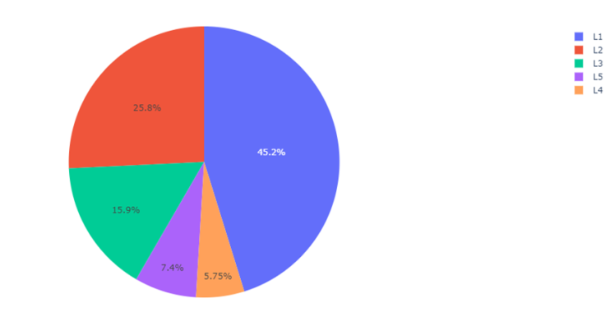

In [ ]:
根据折扣查看订单数量的分布

In [6]:
pie3 = data["Discount"].value_counts()
discount = pie3.index
orders = pie3.values

fig = px.pie(data, values=orders, names=discount)
fig.show()

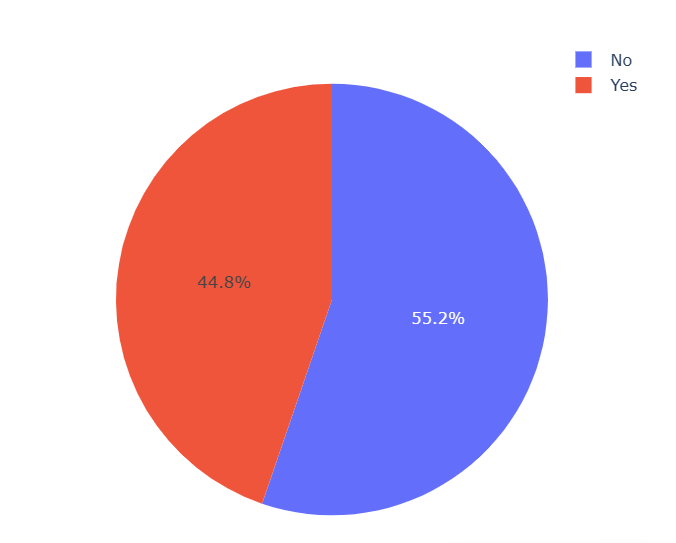

根据上图，如果没有折扣，大多数人仍然会购买保健品。现在让我们看看假期如何影响订单数量

In [7]:
pie4 = data["Holiday"].value_counts()
holiday = pie4.index
orders = pie4.values

fig = px.pie(data, values=orders, names=holiday)
fig.show()

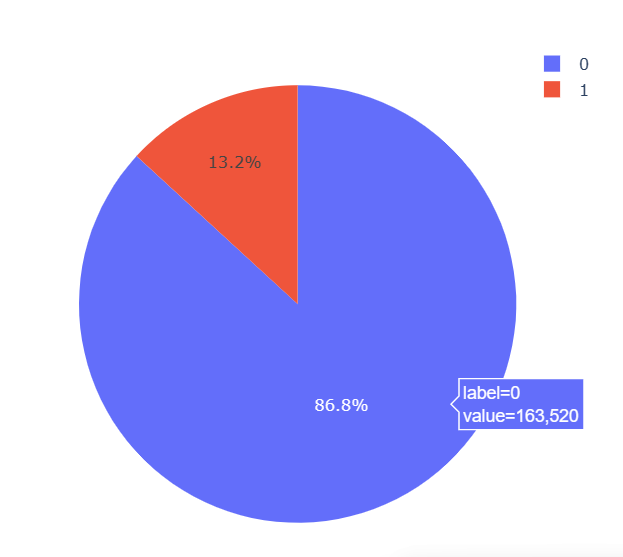

In [ ]:
从上图可以看出，大部分人都是在工作日购买保健品。

In [9]:
data["Discount"] = data["Discount"].map({"No": 0, "Yes": 1})
data["Store_Type"] = data["Store_Type"].map({"S1": 1, "S2": 2, "S3": 3, "S4": 4})
data["Location_Type"] = data["Location_Type"].map({"L1": 1, "L2": 2, "L3": 3, "L4": 4, "L5": 5})
data.dropna()

x = np.array(data[["Store_Type", "Location_Type", "Holiday", "Discount"]])
y = np.array(data["#Order"])

现在让我们准备数据，以便可以为订单数量预测任务训练机器学习模型。在这里，我将一些字符串值更改为数值。

将数据分成 80% 的训练集和 20% 的测试集

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, 
                                                y, test_size=0.2, 
                                                random_state=42)

In [ ]:
使用python库里的梯度增强回归算法来训练模型

In [11]:
import lightgbm as ltb
model = ltb.LGBMRegressor()
model.fit(xtrain, ytrain)

LGBMRegressor()

In [13]:
ypred = model.predict(xtest)
data = pd.DataFrame(data={"预测订单": ypred.flatten()})
print(data.head())

        预测订单
0  69.845351
1  57.122689
2  69.845351
3  69.845351
4  69.845351
